In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

In [2]:
df = pd.read_excel("Decoder+TOC.xlsx")
df.head()

,Shelfmark,Wright Section,Wright Sub-Section,Wright Numeration,Wright Dating,From Date,Wright's Dating Calc.,To Date,Dated,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage
0,"Add.12,133,foll.109-169",Biblical Manuscripts,Old Testament,LI,8c,701.0,701-799,799.0,False,False,False,False,True,False,False,1,31-32,1,31,32.0
1,"Add.12,133,foll.1-108",Biblical Manuscripts,Old Testament,IX,8c(early),701.0,701-799,799.0,False,False,False,False,True,False,False,1,7-8,1,7,8.0
2,"Add.12,134",Biblical Manuscripts,Old Testament,XLIX,697,697.0,697,697.0,True,False,False,False,True,False,False,1,29-31,2,29,31.0
3,"Add.12,135,foll.1-43",Biblical Manuscripts,Old Testament,XL,726,726.0,726,726.0,True,False,False,False,True,False,False,1,24-26,2,24,26.0
4,"Add.12,135,foll.44-207",Theology (Individual),Individual Authors,DCXIII,611,611.0,611,611.0,True,False,False,False,False,True,False,2,486-487,1,486,487.0


In [3]:
df.loc[df['MC'] == True, 'Genre'] = 'Monastic Compilation' 
df.loc[df['Liturgical'] == True, 'Genre'] = 'Liturgy' 
df.loc[df['Scientific'] == True, 'Genre'] = 'Scientific' 
df.loc[df['Biblical'] == True, 'Genre'] = 'Biblical' 
df.loc[df['Individual Theology'] == True, 'Genre'] = 'Individual Theology'
df.loc[df['Other'] == True, 'Genre'] = 'Other'
df['Authors'] = None

#df.set_index("Shelfmark", inplace=True)
df.head()

,Shelfmark,Wright Section,Wright Sub-Section,Wright Numeration,Wright Dating,From Date,Wright's Dating Calc.,To Date,Dated,MC,...,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Genre,Authors
0,"Add.12,133,foll.109-169",Biblical Manuscripts,Old Testament,LI,8c,701.0,701-799,799.0,False,False,...,True,False,False,1,31-32,1,31,32.0,Biblical,None
1,"Add.12,133,foll.1-108",Biblical Manuscripts,Old Testament,IX,8c(early),701.0,701-799,799.0,False,False,...,True,False,False,1,7-8,1,7,8.0,Biblical,None
2,"Add.12,134",Biblical Manuscripts,Old Testament,XLIX,697,697.0,697,697.0,True,False,...,True,False,False,1,29-31,2,29,31.0,Biblical,None
3,"Add.12,135,foll.1-43",Biblical Manuscripts,Old Testament,XL,726,726.0,726,726.0,True,False,...,True,False,False,1,24-26,2,24,26.0,Biblical,None
4,"Add.12,135,foll.44-207",Theology (Individual),Individual Authors,DCXIII,611,611.0,611,611.0,True,False,...,False,True,False,2,486-487,1,486,487.0,Individual Theology,None


In [3]:
df['To Date'].quantile([0.25, 0.5, 0.75])

0.25     699.0
0.50     999.0
0.75    1246.5
Name: To Date, dtype: float64

In [4]:
dated = df.loc[df['Dated'] != False]
dated['To Date'].quantile([0.25, 0.5, 0.75])

0.25     724.50
0.50     936.00
0.75    1241.25
Name: To Date, dtype: float64

In [6]:
dated.count()

Shelfmark                158
Wright Section           158
Wright Sub-Section       158
Wright Numeration        158
Wright Dating            158
From Date                158
Wright's Dating Calc.    158
To Date                  158
Dated                    158
MC                       158
Liturgical               158
Scientific               158
Biblical                 158
Individual Theology      158
Other                    158
Volume                   158
pages                    158
length                   158
firstpage                158
lastpage                 129
Genre                    158
Authors                    0
dtype: int64

In [7]:
early = df.loc[(df['To Date'] < 1000) & (df['Dated'] != False)]
early['To Date'].quantile([0.25, 0.5, 0.75])

0.25    583.25
0.50    725.00
0.75    866.00
Name: To Date, dtype: float64

In [8]:
df_author = pd.read_excel("Wright Authors.xlsx")
df_author.head(10)

,Author,Shelfmark
0,Clement of Rome,"Add.12,150"
1,Titus of Bosra,"Add.12,150"
2,Eusebius,"Add.12,150"
3,Evagrius,"Add.12,175,foll.81-254"
4,Mark the Monk,"Add.12,175,foll.81-254"
5,Palladius,"Add.12,175,foll.81-254"
6,Macarius the Great,"Add.12,175,foll.81-254"
7,Ammonius,"Add.12,175,foll.81-254"
8,Basil,"Add.12,175,foll.81-254"
9,Proclus of Constantinople,"Add.14,610"


In [9]:
df.set_index("Shelfmark", inplace=True)

df_author.set_index('Shelfmark', inplace=True)


In [10]:
ls = df_author.index.drop_duplicates().to_list()
ls

['Add.12,150',
 'Add.12,175,foll.81-254',
 'Add.14,610',
 'Add.12,156',
 'Add.14,597',
 'Add.17,144',
 'Add.17,165',
 'Add.14,581',
 'Add.17,171,foll.1-16',
 'Add.12,175,foll.49-80',
 'Add.17,166',
 'Add.17,181',
 'Add.17,149',
 'Add.14,591',
 'Add.12,169,foll.179-218',
 'Add.12,166,foll.1-154',
 'Add.17,167',
 'Add.14,616',
 'Add.17,164',
 'Add.17,158,foll.1-48',
 'Add.14,607',
 'Add.14,592',
 'Add.17,201,foll.1-15',
 'Add.14,670,foll.19-22',
 'Add.14,663',
 'Add.14,582',
 'Add.14,612',
 'Add.14,602',
 'Add.14,605',
 'Add.17,148',
 'Add.14,546',
 'Add.14,557',
 'Add.12,162',
 'Add.14,608,foll.98-124',
 'Add.14,604',
 'Add.17,173',
 'Add.18,813',
 'Add.14,598',
 'Add.14,666,foll.57-64',
 'Add.14,608,foll.1-97',
 'Add.18,814,foll.1-102',
 'Add.14,618',
 'Add.14,531',
 'Add.14,617',
 'Add.14,536',
 'Add.14,606',
 'Add.14,614,foll.80-127',
 'Add.12,170,foll.136-276',
 'Add.14,590',
 'Add.14,629,foll.1-24',
 'Add.14,621',
 'Add.17,172',
 'Add.14,623',
 'Add.15,580',
 'Add.12,167',
 'Add.17

In [11]:
df.loc['Add.12,156']['Authors']

In [12]:
tr = df_author.loc['Add.12,150']
type(tr['Author'])

pandas.core.series.Series

In [13]:
ls = df_author.index.drop_duplicates().to_list()
for x in ls:
    authors = df_author.loc[x]
    try:
        df.Authors.loc[x] = authors['Author'].tolist()
    except:
        df.Authors.loc[x] = [authors['Author']]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
authors = df.loc[(df['To Date'] < 1000) & (df['Wright Sub-Section'] == 'Collected Authors')]['Authors'].to_list()
mc_ls = []
for x in authors:
    if x is not None:
        for author in x:
            mc_ls.append(author)

mc_ls.sort()
mc_ls
          
        

['Abraham of Natphar',
 'Abraham of Natphar',
 'Alexander of Alexandria',
 'Ammonius',
 'Ammonius',
 'Anthony',
 'Athanasius',
 'Athanasius',
 'Athanasius',
 'Athanasius',
 'Athanasius',
 'Athanasius',
 'Balai',
 'Balai',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Book of Steps',
 'Book of Steps',
 'Book of Steps',
 'Clement of Rome ',
 'Clement of Rome ',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Didymus of Alexandria',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Dioscorus',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',

In [15]:
authors = df.loc[(df['To Date'] < 1000) & (df['Wright Sub-Section'] != 'Collected Authors')]['Authors'].to_list()
authors_ls = []
for x in authors:
    if x is not None:
        for author in x:
            authors_ls.append(author)

authors_ls.sort()
authors_ls

['Ambrose',
 'Answers of Egyptian Fathers',
 'Antonius of Tagrit',
 'Antonius of Tagrit',
 'Aphrahat',
 'Aphrahat',
 'Aphrahat',
 'Aristotle',
 'Athanasius',
 'Athanasius',
 'Athanasius',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Basil',
 'Book of Steps',
 'Clement of Rome ',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Cyril of Alexandria',
 'Daniel Salah',
 'Daniel Salah',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Dionysius',
 'Elias of Antioch',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',
 'Ephrem',

In [16]:
unique = []
for author in mc_ls:
    if author in authors_ls:
        continue
    else:
        unique.append(author)

unique
        

['Abraham of Natphar',
 'Abraham of Natphar',
 'Alexander of Alexandria',
 'Ammonius',
 'Ammonius',
 'Anthony',
 'Balai',
 'Balai',
 'Didymus of Alexandria',
 'Dioscorus',
 'Erechteus of Tarsus',
 'Felix of Rome',
 'Gregory Thaumaturgus',
 'Gregory Thaumaturgus',
 'Gregory Thaumaturgus',
 'Gregory Thaumaturgus',
 'Isocrates',
 'Life of Anthony',
 'Macarius of Alexandria',
 'Macarius the Great',
 'Macarius the Great',
 'Macarius the Great',
 'Macarius the Great',
 'Macarius the Great',
 'Marcianus the Monk',
 'Marcianus the Monk',
 'Marcianus the Monk',
 'Paul of Antioch',
 'Peter of Callinicus',
 'Rabulas of Edessa',
 'Thaumasias',
 'Theodoret',
 'Theophilus of Alexandria',
 'Theophilus of Alexandria',
 'Timotheus (Aelurus)',
 'Titus of Bosra']

In [4]:
tr = df.set_index(["Genre"])
tr.head()

,Shelfmark,To Date,Wright Section,Wright Sub-Section,Authors,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Wright’s Numeration,From Date,Dated,Wright's Dating
Genre,,,,,,,,,,,,,,,,,,,,
Biblical,"Add.12,133,foll.109-169",799.0,Biblical Manuscripts,Old Testament,NaN,False,False,False,True,False,False,2,41,1,41,41.0,DXXXVIII,501,False,6c
Biblical,"Add.12,133,foll.1-108",799.0,Biblical Manuscripts,Old Testament,NaN,False,False,False,True,False,False,2,413-414,1,413,414.0,DXL,501,False,6c
Biblical,"Add.12,134",697.0,Biblical Manuscripts,Old Testament,NaN,False,False,False,True,False,False,1,84-85,1,84,85.0,CXXXIV,401,False,5c-6c
Biblical,"Add.12,135,foll.1-43",726.0,Biblical Manuscripts,Old Testament,NaN,False,False,False,True,False,False,2,405-406,1,405,406.0,DXXXI,599,False,599
Individual Theology,"Add.12,135,foll.44-207",611.0,Theology (Individual),Individual Authors,Cyril of Alexandria,False,False,False,False,True,False,1,83-84,1,83,84.0,CXXXII,1001,False,11c


In [29]:
df.columns

Index(['To Date', 'Wright Section', 'Wright Sub-Section', 'MC', 'Liturgical',
       'Scientific', 'Biblical', 'Individual Theology', 'Other', 'Authors',
       'Volume', 'pages', 'length', 'firstpage', 'lastpage',
       'Wright’s Numeration', 'From Date', 'Dated', 'Wright's Dating',
       'Genre'],
      dtype='object')

In [5]:
tr.drop(['Wright Section', 'Wright Sub-Section', 'MC', 'Liturgical', 'Scientific', 'Biblical', 'Individual Theology', 'Other', 'Authors',
        'Volume', 'pages', 'length', 'firstpage', 'lastpage', 'Wright’s Numeration', 'From Date', 'Dated', 'Wright\'s Dating'], axis=1, inplace=True)
tr.head(10)

,Shelfmark,To Date
Genre,,
Biblical,"Add.12,133,foll.109-169",799.0
Biblical,"Add.12,133,foll.1-108",799.0
Biblical,"Add.12,134",697.0
Biblical,"Add.12,135,foll.1-43",726.0
Individual Theology,"Add.12,135,foll.44-207",611.0
Biblical,"Add.12,136",699.0
Biblical,"Add.12,137",699.0
Biblical,"Add.12,138",899.0
Liturgy,"Add.12,139",1000.0


In [6]:
tr.sort_index(inplace=True)
tr.head(10)

,Shelfmark,To Date
Genre,,
Biblical,"Add.12,133,foll.109-169",799.0
Biblical,"Add.17,224,foll.43-57",1173.0
Biblical,"Add.17,224,foll.37-42",1299.0
Biblical,"Add.14,541,fol.52",899.0
Biblical,"Add.14,541,foll.50,51",699.0
Biblical,"Add.17,224,fol.66",1299.0
Biblical,"Add.14,572",599.0
Biblical,"Add.14,736,fol.34",1299.0
Biblical,"Add.17,218,fol.97",NaN


In [9]:
tr.drop("Shelfmark", axis=1, inplace=True)

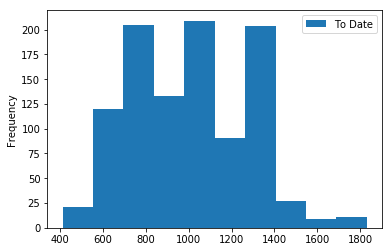

In [7]:
tr.plot(kind="hist")

In [29]:
tr.index

Index(['Biblical', 'Biblical', 'Biblical', 'Biblical', 'Biblical', 'Biblical',
       'Biblical', 'Biblical', 'Biblical', 'Biblical',
       ...
       'Scientific', 'Scientific', 'Scientific', 'Scientific', 'Scientific',
       'Scientific', 'Scientific', 'Scientific', 'Scientific', 'Scientific'],
      dtype='object', name='Genre', length=1035)

Genre
Biblical                AxesSubplot(0.125,0.125;0.775x0.755)
Individual Theology     AxesSubplot(0.125,0.125;0.775x0.755)
Liturgy                 AxesSubplot(0.125,0.125;0.775x0.755)
Monastic Compilation    AxesSubplot(0.125,0.125;0.775x0.755)
Other                   AxesSubplot(0.125,0.125;0.775x0.755)
Scientific              AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

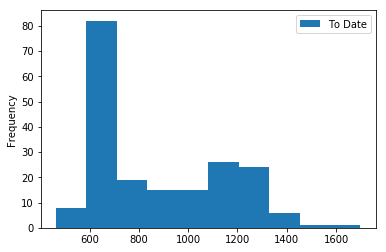

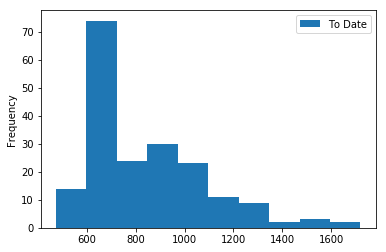

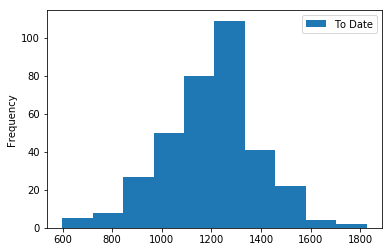

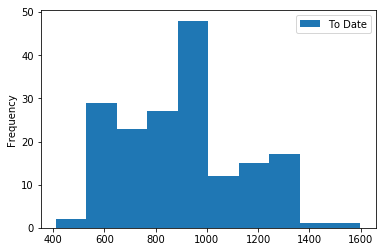

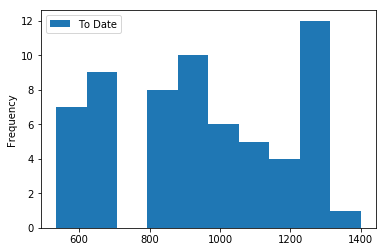

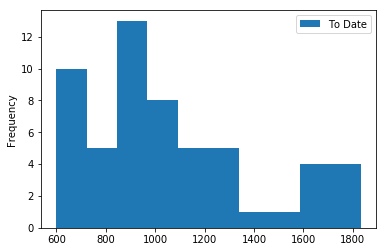

In [8]:
tr.groupby("Genre").plot(kind="hist")

In [11]:
filtered = tr[tr["To Date"]<750]
filtered

,Shelfmark,To Date,Wright Section,Wright Sub-Section,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Wright’s Numeration,From Date,Dated,Wright's Dating,Genre
Authors,,,,,,,,,,,,,,,,,,,,
NaN,"Add.12,134",697.0,Biblical Manuscripts,Old Testament,False,False,False,True,False,False,1,84-85,1,84,85.0,CXXXIV,401,False,5c-6c,Biblical
NaN,"Add.12,135,foll.1-43",726.0,Biblical Manuscripts,Old Testament,False,False,False,True,False,False,2,405-406,1,405,406.0,DXXXI,599,False,599,Biblical
Cyril of Alexandria,"Add.12,135,foll.44-207",611.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,83-84,1,83,84.0,CXXXII,1001,False,11c,Individual Theology
NaN,"Add.12,136",699.0,Biblical Manuscripts,Old Testament,False,False,False,True,False,False,1,9,1,9,9.0,CXXXIX,501,False,6c-7c,Biblical
NaN,"Add.12,137",699.0,Biblical Manuscripts,New testament,False,False,False,True,False,False,1,112-113,1,112,113.0,CLXV,1001,False,11c-12c,Biblical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ephrem,"Add.17,218,fol.43",699.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,2,467,1,467,467.0,DLXXXIV,501,False,6c,Individual Theology
NaN,"Add.17,218,fol.84",599.0,Anonymous Works,Anonymous Works,False,False,False,False,False,True,1,75-76,1,75,76.0,CXX,936,False,936,Other
NaN,"Add.18,812",699.0,Biblical Manuscripts,New testament,False,False,False,True,False,False,2,469,1,469,469.0,DLXXXVI,501,False,6c-7c,Biblical


In [12]:
filtered.sort_index(inplace=True)
filtered


C:\Users\noammaeir\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Shelfmark,To Date,Wright Section,Wright Sub-Section,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Wright’s Numeration,From Date,Dated,Wright's Dating,Genre
Authors,,,,,,,,,,,,,,,,,,,,
Aphrahat,"Add.14,619",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,126-127,1,126,127.0,CLXXVIII,901,False,10c,Individual Theology
Aphrahat,"Add.17,182,foll.1-99",474.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,29-31,2,29,31.0,XLIX,697,False,697,Individual Theology
Aphrahat,"Add.17,182,foll.100-175",512.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,63-64,1,63,64.0,LXXXIX,501,False,6c-7c,Individual Theology
Athanasius,"Add.14,568",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,2,550-554,4,550,554.0,DCLXXXVIII,601,False,7c-8c,Individual Theology
Basil,"Add.14,543",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,108-111,3,108,111.0,CLXII,801,False,9c-10c,Individual Theology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,"Add.17,217,fol.54",699.0,Service Books,Lectionaries,False,True,False,False,False,False,2,468-469,1,468,469.0,DLXXXV,501,False,6c,Liturgy
NaN,"Add.17,217,fol.60",599.0,Scientific Literature,Natural History,False,False,True,False,False,False,1,93,1,93,93.0,CXLVI,901,False,10c-11c,Scientific
NaN,"Add.17,218,fol.84",599.0,Anonymous Works,Anonymous Works,False,False,False,False,False,True,1,75-76,1,75,76.0,CXX,936,False,936,Other


In [14]:
filtered.loc['Basil']

,Shelfmark,To Date,Wright Section,Wright Sub-Section,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Wright’s Numeration,From Date,Dated,Wright's Dating,Genre
Authors,,,,,,,,,,,,,,,,,,,,
Basil,"Add.14,543",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,108-111,3,108,111.0,CLXII,801,False,9c-10c,Individual Theology
Basil,"Add.14,542",509.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,154-159,5,154,159.0,CCXXIV,1000,False,1000,Individual Theology
Basil,"Add.14,544",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,321-324,3,321,324.0,CCCCX,1001,False,11c-12c,Individual Theology
Basil,"Add.14,545",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,2,474-475,1,474,475.0,DXCII,501,False,6c-7c,Individual Theology
Basil,"Add.17,186",599.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,60-61,1,60,61.0,LXXXV,1101,False,12c,Individual Theology
Basil,"Add.17,143",499.0,Theology (Individual),Individual Authors,False,False,False,False,True,False,1,24,1,24,24.0,XXXIX,601,False,7c,Individual Theology


In [ ]:
filtered.groupby("Authors").count()

In [16]:
df.groupby("Authors").count()

,Shelfmark,To Date,Wright Section,Wright Sub-Section,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,Wright’s Numeration,From Date,Dated,Wright's Dating,Genre
Authors,,,,,,,,,,,,,,,,,,,,
Andrew of Crete,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antonius of Tagrit,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Aphrahat,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Athanasius,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Basil,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Cyril of Alexandria,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Daniel Salah,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Dionysius,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Elias of Antioch,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
